# Sock Launch Lab
## PH 211 COCC
### Bruce Emerson 2/15/2021

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. 

[Sock Launch Lab](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabSockLaunch.html)

In this lab we are using kinematics and plots to predict the two dimensional motion of an object flying through the air here on earth. The object will be going slow enough that we expect that airdrag is minimal but our data may suggest otherwise.

After we determine the velocity of the projectile we will determine the coefficient of friction between that object and a countertop.

## Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  

The following code cell will need to be run first before any other code cells.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
from scipy.optimize import fsolve

### The simple physics model...sort of...

Because a freebody diagram for a projectile, after it is launched, has just one force (assuming no air drag), Newton's 2nd Law affirms that the acceleration must also be constant. When the acceleration is constant we have a particular set of results from integrating the acceleration to get velocity and position described by the following equations:

For the horizontal direction where there are no forces which $\implies \bar{a}_x = 0$:  

$$ x_f = x_0 + v_{0_x} \cdot \Delta t$$

For the vertical direction where $\bar{F}_{net} = \bar{F}_g = \bar{mg} = m\bar{a}_y \implies g = |\bar{a}_y| = constant$:  

$$ v_f = v_0 + a_y \cdot \Delta t$$

$$ y_f = y_0 + v_{0_y} \cdot \Delta t + \frac{1}{2} a_y \cdot \Delta t^2 $$

We need to know the intial position of the projectile as well as the magnitude and direction of it's initial velocity to calculate it's path. Alternatively we can know something about where it lands and figure out how fast it was going.


### Your Data: Projectile

Your data will be the distance that your projectile lands from the edge of the counter and the height of the counter. However you choose to measure these they need to be reported here in SI units (meters). What we are doing here is typical in technical papers where we report the underlying data and expectations before we move forward with computations and modeling. It is also standard to report your data in the text of the report.

- counter height: 1.0 m
- range (min/max/average): 1.1 m, 1.25 m, 1.2 m
- gravity: $9.81\: m/s^2$

Range is defined to be the distance on the floor from a point just under where the projectile left the counter to the point it landed on the floor.

In [29]:
# counter height
initialy = 1.01 # initial height in m
initialx = 0. # initial horizontal location

# data - measured range min/max/average
rangeMin = 1.1
rangeMax = 1.25
rangeMean = 1.2

# useful constants
gravity_moon = 1.62
gravity_earth = 9.81
accely = - gravity_earth

***
## Lab Deliverable:

Describe the method you used to develop your projectile launching skill as well as a list of the data you gathered for the range of the projectile, min and max values, and the height of the counter from which the projectile was launched.

***

### Model Parameters

We have been using models as scientists and engineers do which is to say we compute what our model says the object will do and then compare it to what we observe. To implement the model described previously we need to specify a number of model parameters. The most important of these are the initial velocity of the projectile and the angle at which it is launched. 

- initial velocity: (adjusted to get model to match data)
- launch angle: $0^{\circ}$

For the Sock Launch lab we will be considering a launch angle of $0^{\circ}$ (horizontal) but this notebook allows for the possibility of angled launches.

In [30]:
# option to change launch angle
launch_angle_deg = 0.
anglerad = launch_angle_deg*np.pi/180. # convert to radians to keep numpy happy

# initial conditions
initialvelocity = 3.1 # in m/s

# x and y components of the initial velocity
velinitialy = initialvelocity*np.sin(anglerad)
velinitialx = initialvelocity*np.cos(anglerad)

### Model Implementation

As we have done before we start by generating a range of points in time that we will use to determine the x and y location of the object. This is very much like our Rock Drop lab.

In [31]:
# generate x values for model of data
maxtime = .5
numpoints = 200
modeltime = np.linspace(0.,maxtime,numpoints)

# generate x and y values for each time
modely = initialy**1.1 + velinitialy*modeltime + 0.5*accely*modeltime**2
modelx = initialx + velinitialx*modeltime


### Plot Model 

Just like we've done previously with different labels etc etc

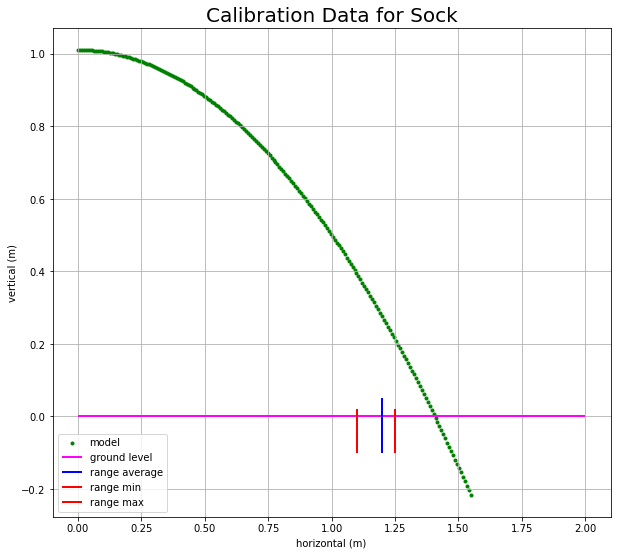

In [32]:
fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.scatter(modelx, modely,
            marker = '.', color = 'green',
            label = "model")

# plot the model for my possible higher speed and angle
#ax2.scatter(highx, highy,
#            marker = '.', color = 'red',
#            label = "data")

# draw a horizontal line across the plot to show the ground
ax2.hlines(0, 0, 2,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "ground level")

# vertical line to show average range
ax2.vlines(rangeMean, 0.05*initialy ,-0.1*initialy,
         color = 'blue', linestyle = '-',
         linewidth = 2., label = "range average")

# minimum and max range observed
ax2.vlines(rangeMin, 0.02*initialy ,-0.1*initialy,
         color = 'red', linestyle = '-',
         linewidth = 2., label = "range min")

ax2.vlines(rangeMax, 0.02*initialy, -0.1*initialy,
         color = 'red', linestyle = '-',
         linewidth = 2., label = "range max")

# a more explicit way to set labels
plt.xlabel('horizontal (m)', fontsize = 10)
plt.ylabel('vertical (m)', fontsize = 10)
plt.title('Calibration Data for Sock', fontsize = 20)

fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 3)
plt.show()

***
## Lab Deliverable:

Using the model plot above adjust the initial velocity of the model until the projectile lands at the average range. Report this initial value of the velocity. Then determine the initial velocity that gives the minimum and maximum ranges from your data. All this could be done algebraically but it also works smoothly just adjusting the model. 

***

### Finding zeros

I have some thinking to do about how and why my physics brain wants to create these plots this way. In the meantime the question remains "How to ask python where the projectile hits the ground?". If we think about how we do it looking at the graph we look at the y values until they get to zero and then try to work out what the time would be (since the plot doesn't show time). What I have is a list of y values and I can use the ```np.where``` function to determine which elements in the list are less than 0. 

[np.where](https://numpy.org/doc/1.18/reference/generated/numpy.where.html)

np.where returns the element number (which element in the list between 0 and maximum). I can then associate that with the list of model times. **IF** y is less than zero it must be just about to hit one unit of time before that. 

In [33]:
# extract the elements of the model that are 'below' the ground
below_ground_elements = np.where(modely < 0.)
just_after_contact = np.min(below_ground_elements)

print("The projectile lands between %.4f and %.4f (s)" % 
      (modeltime[just_after_contact-1],
       modeltime[just_after_contact]))

print("It's range is %.4f and %.4f (m) at those times" % 
      (modelx[just_after_contact-1],
       modelx[just_after_contact]))

print("It's height is %.4f and %.4f (m) at those times" % 
      (modely[just_after_contact-1],
       modely[just_after_contact]))


The projectile lands between 0.4523 and 0.4548 (s)
It's range is 1.4020 and 1.4098 (m) at those times
It's height is 0.0077 and -0.0034 (m) at those times


### Your Data: Friction

Assuming that you can generate a known initial velocity for your 'projectile' we can use kinematics to determine the acceleration due to the frictional force. When you slide (careful that the projectile doesn't roll) the projectile across the counter it will come a rest in some distance. If the frictional force is constant than it will produce a constant acceleration. The following kinematic equations will apply.

.$$ v_f = v_0 + a \cdot \Delta t$$

.$$ x_f = x_0 + v_{0} \cdot \Delta t + \frac{1}{2} a \cdot \Delta t^2 $$

.$$ v_f^2 = v_0^2 + 2 \: a \: (x_f - x_0) $$


***
## Lab Deliverable:

Present your data for the stopping distance of your projectile along the countertop. Then choose which of the previous equations you will use to determine the acceleration of the projectile. Present each of the algebraic steps for determining that acceleration in a markdown cell. I am looking for you to present the algebra you would usually show me in a homework problem using markdown tools. Be sure you start with the equation as given and show at least two algebraic steps as well as a separate line for embedding the values WITH units. Lots to practice here.

Once you have determined the acceleration can you determine the coefficient of friction $\mu_k$ from your Newtonian analysis? You will need to know the mass of your projectile. Determining the mass of your projectile is not a trivial matter without a scale. You may assume that the mass of your projectile is between 60 g (1 pair calf height athletic) and 100 g (knee high or heavier). Show your calculation and results. 

***

***
## Lab Deliverable: Reflection

Having determined the purported coefficient of friction between the material of your projectile and the countertop is there a way to check that you have a reasonable result? Given that coefficients of friction are typically between 0.05 and 1 does your value fall in that range? Does your value for the initial velocity of the projectile seem reasonable given that the flight time for something sliding off the counter is consistent at 0.45 s?

***

## My Reflection

As usual I learned a bunch of new stuff in the process of developing this notebook as a framework for your lab report. Thanks.

### Extensions

Because my experience leads me to build physics models as lists as opposed to continuous functions the issue of finding the intersection with the ground is a little clunky. It is a future plan to figure out how to create a continuous function (if that is possible) that will have a definite zero. How would I do that?  As I dig around I keep coming back to the sense that python is always actually plotting discrete lists of numbers and not true continuous functions. 